In [1]:
from brainlit.viz.visualize import plot_image_2d
from brainlit.utils.ngl_pipeline import NeuroglancerSession
import numpy as np
from pathlib import Path
import os

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/python_jsonschema_objects/__init__.py:53: UserWarning: Schema version http://json-schema.org/draft-04/schema not recognized. Some keywords and features may not be supported.
  self.schema["$schema"]
Using TensorFlow backend.


## Loading data from neuroglancer precomputed format

Image data will be assumed to be stored locally in precomuted format, such as
```6173_6173_6173/ 6173_6173_6173/0-66_0-50_0-52 info```.

Skeleton data will be assumed to be stored locally in precomputed format, such as
```skeletons/, skeletons/1.gz skeletons/info```

A user only needs to specity these paths.
### The paths can be modified to generated files from different data

In [2]:
directory = Path("..") / ".." / "tests"
layer_location = "file://" + os.fspath(directory) + "/test_precomputed/"
sess = NeuroglancerSession(layer_location, mip=0)

The info file of the image data can be viewed via the `info`property

In [3]:
sess.cv.info

{'data_type': 'uint64',
 'num_channels': 1,
 'scales': [{'chunk_sizes': [[64, 64, 64]],
   'encoding': 'raw',
   'key': '6173_6173_6173',
   'resolution': [6173, 6173, 6173],
   'size': [1056, 800, 416],
   'voxel_offset': [0, 0, 0]}],
 'skeletons': 'skeletons',
 'type': 'segmentation'}

The info file of a skeleton in the skeleton data can be viewed by pulling via the `get` method

In [4]:
skel = sess.cv.skeleton.get(1)

Downloading: 100%|██████████| 1/1 [00:00<00:00, 656.59it/s]


In [5]:
skel

Skeleton(segid=1, vertices=(shape=7, float32), edges=(shape=6, uint32), radius=(7, float32), vertex_types=(7, uint8), space='physical' transform=[[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0]])

In [6]:
skel.vertices

array([[-2344678., -2343678., -2342678.],
       [-2343678., -2342678., -2341678.],
       [-2342678., -2341678., -2340678.],
       [-2341678., -2340678., -2339678.],
       [-2340678., -2339678., -2338678.],
       [-2339678., -2338678., -2337678.],
       [-2338678., -2337678., -2336678.]], dtype=float32)

The data can be viewed by pulling a region.

In [7]:
image = np.squeeze(sess.cv[0])

Downloading:   0%|          | 0/12 [00:00<?, ?it/s]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15f95af28>)

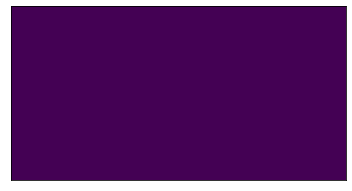

In [8]:
plot_image_2d(image)